In [ ]:
# Rafeef Farhan 20200969 section 2
# Osama Obaidat 20221051 section 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("/content/diabetic_data.csv")

In [ ]:
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
data.replace("?", None, inplace = True)

In [ ]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
data.duplicated().sum()

0

In [ ]:
#unique values
for i in data.columns:
 print(i,data[i].unique(),'\n')

data["admission_type_id"].replace({6:None}, inplace = True)
data["discharge_disposition_id"].replace({18:None}, inplace = True)
data["admission_source_id"].replace({17:None}, inplace = True)

encounter_id [  2278392    149190     64410 ... 443854148 443857166 443867222] 

patient_nbr [  8222157  55629189  86047875 ... 140199494 120975314 175429310] 

race ['Caucasian' 'AfricanAmerican' None 'Other' 'Asian' 'Hispanic'] 

gender ['Female' 'Male' 'Unknown/Invalid'] 

age ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)'] 

weight [None '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200'] 

admission_type_id [6 1 2 3 4 5 8 7] 

discharge_disposition_id [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27] 

admission_source_id [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13] 

time_in_hospital [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14] 

payer_code [None 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC'
 'OT' 'OG' 'MP' 'FR'] 

medical_specialty ['Pediatrics-Endocrinology' None 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Su

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         96475 non-null   object
 7   discharge_disposition_id  98075 non-null   object
 8   admission_source_id       94985 non-null   object
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
data.nunique()

encounter_id                101766
patient_nbr                  71518
race                             5
gender                           3
age                             10
weight                           9
admission_type_id                7
discharge_disposition_id        25
admission_source_id             16
time_in_hospital                14
payer_code                      17
medical_specialty               72
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         716
diag_2                         748
diag_3                         789
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [ ]:
data['patient_nbr'].duplicated().sum()
# patients are not unique. encounters (visits) are

30248

In [ ]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id            5291
discharge_disposition_id     3691
admission_source_id          6781
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [ ]:
null_percet= (data.isnull().sum()/(len(data)))*100
for column, count in null_percet.iteritems():
    if count > 0:
        print(f'Column "{column}" has {count}% null.')

Column "race" has 2.2335554114340743% null.
Column "weight" has 96.85847925633315% null.
Column "admission_type_id" has 5.199182438142405% null.
Column "discharge_disposition_id" has 3.6269480966138% null.
Column "admission_source_id" has 6.663325668690918% null.
Column "payer_code" has 39.5574160328597% null.
Column "medical_specialty" has 49.08220820313268% null.
Column "diag_1" has 0.02063557573256294% null.
Column "diag_2" has 0.3517874339170253% null.
Column "diag_3" has 1.398305917497003% null.


<ipython-input-13-a5c4999010bc>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, count in null_percet.iteritems():


In [ ]:
# only first encounter per patient
data_removed = data.drop_duplicates(subset=['patient_nbr'], keep='first')

In [ ]:
# remove all encounters that ended in hospice / death

condition = (data_removed['discharge_disposition_id'] == 11)
data_removed = data_removed[~condition]
condition = (data_removed['discharge_disposition_id'] == 13)
data_removed = data_removed[~condition]
condition = (data_removed['discharge_disposition_id'] == 14)
data_removed = data_removed[~condition]
condition = (data_removed['discharge_disposition_id'] == 19)
data_removed = data_removed[~condition]
condition = (data_removed['discharge_disposition_id'] == 20)
data_removed = data_removed[~condition]
condition = (data_removed['discharge_disposition_id'] == 21)
data_removed = data_removed[~condition]

In [ ]:
data_removed[(data_removed["number_inpatient"] > 10) | (data_removed["number_outpatient"] > 10) | (data_removed["number_emergency"] > 10)].groupby("readmitted").count()
data_removed.groupby("readmitted").count()
# this shows the importance of the three features

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
readmitted,,,,,,,,,,,,,,,,,,,,,
<30,6277,6277,6136,6277,6277,303,5827,6026,5855,6277,...,6277,6277,6277,6277,6277,6277,6277,6277,6277,6277
>30,22222,22222,21787,22222,22222,1315,20347,21669,20492,22222,...,22222,22222,22222,22222,22222,22222,22222,22222,22222,22222
NO,41474,41474,40132,41474,41474,1170,39283,39804,38806,41474,...,41474,41474,41474,41474,41474,41474,41474,41474,41474,41474


In [ ]:
for i in data_removed.columns:
 print(i,data_removed[i].unique(),'\n')

encounter_id [  2278392    149190     64410 ... 443842070 443842340 443867222] 

patient_nbr [  8222157  55629189  86047875 ... 140199494 120975314 175429310] 

race ['Caucasian' 'AfricanAmerican' None 'Other' 'Asian' 'Hispanic'] 

gender ['Female' 'Male' 'Unknown/Invalid'] 

age ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)'] 

weight [None '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200'] 

admission_type_id [None 1 2 3 4 5 8 7] 

discharge_disposition_id [25 1 3 6 2 5 7 10 4 None 8 12 17 16 22 23 9 15 28 24 27] 

admission_source_id [1 7 2 4 5 20 6 3 None 8 9 14 10 22 11 25 13] 

time_in_hospital [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14] 

payer_code [None 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC'
 'OT' 'OG' 'MP' 'FR'] 

medical_specialty ['Pediatrics-Endocrinology' None 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics

In [ ]:
data_removed.drop(['encounter_id', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'examide', 'citoglipton', 'glimepiride-pioglitazone'], axis=1, inplace = True)

# >30 and <30 is a yes to readmission; no is the same
# readmitted ['NO' '>30' '<30']
data_removed["readmitted"].replace({">30":1, "<30":1, "NO":0}, inplace = True)
# max_glu_serum ['None' '>300' 'Norm' '>200']
data_removed["max_glu_serum"].replace({"None":0, "Norm":0.33, ">200":0.66, ">300": 1}, inplace = True)
# A1Cresult ['None' '>7' '>8' 'Norm']
data_removed["A1Cresult"].replace({"None":0, "Norm":0.33, ">7":0.66, ">8":1}, inplace = True)
# change ['No' 'Ch']
data_removed["change"].replace({"No":0, "Ch":1}, inplace = True)
# diabetesMed ['No' 'Yes']
data_removed["diabetesMed"].replace({"No":0, "Yes":1}, inplace = True)

# medicines
med = ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose",
       "miglitol", "troglitazone", "tolazamide", "insulin", "glyburide-metformin", "glipizide-metformin", "metformin-rosiglitazone",
       "metformin-pioglitazone"]
for i in med:
  data_removed[i].replace({"No":1, "Steady": 0.33, "Up":0, "Down":0.66}, inplace = True)


In [ ]:
# Categorical columns
cat_cols=[]
for i in data_removed.columns:
  if data_removed[i].dtypes=="object":
    cat_cols.append(i)
cat_cols

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id']

In [ ]:
# Numerical columns
num_cols=[]
for col in data_removed.columns:
  if i in med:
    continue
  if data_removed[col].dtype!='object':
    num_cols.append(col)
num_cols

['patient_nbr',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [ ]:
data_removed['admission_source_id'].fillna(str(data_removed['admission_source_id'].mode().iloc[0]), inplace = True)
data_removed['discharge_disposition_id'].fillna(str(data_removed['discharge_disposition_id'].mode().iloc[0]), inplace = True)
data_removed['admission_type_id'].fillna(str(data_removed['admission_type_id'].mode().iloc[0]), inplace = True)
data_removed['race'].fillna("Missing", inplace = True)

In [ ]:
original_list = num_cols
values_to_remove = ["readmitted", "metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose",
       "miglitol", "troglitazone", "tolazamide", "insulin", "glyburide-metformin", "glipizide-metformin", "metformin-rosiglitazone",
       "metformin-pioglitazone", "max_glu_serum", "A1Cresult", "change", "diabetesMed"]

filtered_list = [x for x in original_list if x not in values_to_remove]

print(filtered_list)
num_cols = filtered_list


['patient_nbr', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


In [ ]:
cat_cols

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id']

In [ ]:
encode = ["race", "gender", "age"]
data_removed["admission_type_id"] = data_removed["admission_type_id"].astype('float64')
data_removed["discharge_disposition_id"] = data_removed["discharge_disposition_id"].astype('float64')
data_removed["admission_source_id"] = data_removed["admission_source_id"].astype('float64')

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in encode:
    data_removed[column] = label_encoder.fit_transform(data_removed[column])

In [ ]:
data_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69973 entries, 0 to 101765
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_nbr               69973 non-null  int64  
 1   race                      69973 non-null  int64  
 2   gender                    69973 non-null  int64  
 3   age                       69973 non-null  int64  
 4   admission_type_id         69973 non-null  float64
 5   discharge_disposition_id  69973 non-null  float64
 6   admission_source_id       69973 non-null  float64
 7   time_in_hospital          69973 non-null  int64  
 8   num_lab_procedures        69973 non-null  int64  
 9   num_procedures            69973 non-null  int64  
 10  num_medications           69973 non-null  int64  
 11  number_outpatient         69973 non-null  int64  
 12  number_emergency          69973 non-null  int64  
 13  number_inpatient          69973 non-null  int64  
 14  numbe

In [ ]:
data_removed.index=data_removed["patient_nbr"]

In [ ]:
num_cols.remove("patient_nbr")

In [ ]:
scaler = StandardScaler()
data_removed[num_cols] = scaler.fit_transform(data_removed[num_cols])

In [ ]:
target = data_removed["readmitted"]
data_removed.drop(["patient_nbr", "readmitted"], axis = 1, inplace = True)

In [ ]:
data_removed

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
patient_nbr,,,,,,,,,,,,,,,,,,,,,
8222157,2,0,0,1.0,25.0,1.0,-1.115654,-0.094300,-0.811292,-1.769630,...,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0,0
55629189,2,0,1,1.0,1.0,7.0,-0.433968,0.810478,-0.811292,0.281729,...,1.0,1.0,1.0,0.00,1.0,1.0,1.0,1.0,1,1
86047875,0,0,2,1.0,1.0,7.0,-0.774811,-1.602263,2.034276,-0.321612,...,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0,1
82442376,2,1,3,1.0,1.0,7.0,-0.774811,0.056496,-0.242178,0.040393,...,1.0,1.0,1.0,0.00,1.0,1.0,1.0,1.0,1,1
42519267,2,1,4,1.0,1.0,7.0,-1.115654,0.408354,-0.811292,-0.924953,...,1.0,1.0,1.0,0.33,1.0,1.0,1.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183087545,2,0,7,1.0,1.0,7.0,1.611090,0.358089,0.326935,2.091752,...,1.0,1.0,1.0,0.33,1.0,1.0,1.0,1.0,1,1
188574944,5,0,4,1.0,1.0,7.0,3.315304,1.514194,2.603390,1.247075,...,1.0,1.0,1.0,0.00,1.0,1.0,1.0,1.0,1,1
140199494,5,0,6,1.0,1.0,7.0,-0.774811,0.157027,2.603390,0.161061,...,1.0,1.0,1.0,0.33,1.0,1.0,1.0,1.0,0,1


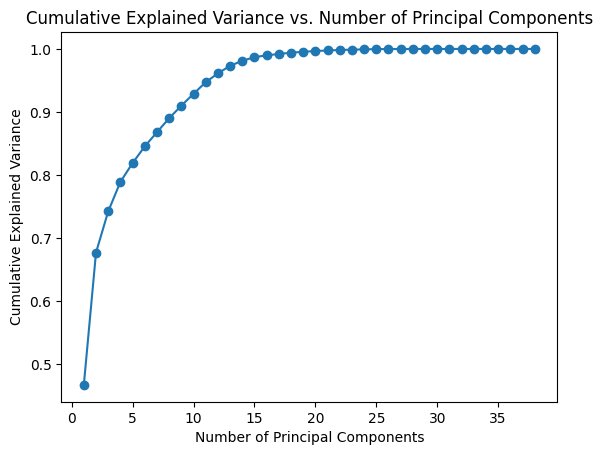

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_removed)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

# 13 pcas

In [ ]:
pca = PCA(n_components = 13)

pca.fit(data_removed)

data_final = pd.DataFrame(pca.transform(data_removed), columns = (["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13"]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_final, target, test_size=0.2, random_state=42)


model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, verbose = 2, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'\nTest Accuracy: {test_accuracy}')


Epoch 1/10
1400/1400 - 5s - loss: 0.6552 - accuracy: 0.6171 - val_loss: 0.6547 - val_accuracy: 0.6158 - 5s/epoch - 3ms/step
Epoch 2/10
1400/1400 - 3s - loss: 0.6491 - accuracy: 0.6238 - val_loss: 0.6523 - val_accuracy: 0.6151 - 3s/epoch - 2ms/step
Epoch 3/10
1400/1400 - 3s - loss: 0.6469 - accuracy: 0.6243 - val_loss: 0.6503 - val_accuracy: 0.6185 - 3s/epoch - 2ms/step
Epoch 4/10
1400/1400 - 4s - loss: 0.6450 - accuracy: 0.6292 - val_loss: 0.6486 - val_accuracy: 0.6258 - 4s/epoch - 3ms/step
Epoch 5/10
1400/1400 - 3s - loss: 0.6434 - accuracy: 0.6302 - val_loss: 0.6489 - val_accuracy: 0.6232 - 3s/epoch - 2ms/step
Epoch 6/10
1400/1400 - 3s - loss: 0.6420 - accuracy: 0.6297 - val_loss: 0.6499 - val_accuracy: 0.6225 - 3s/epoch - 2ms/step
Epoch 7/10
1400/1400 - 3s - loss: 0.6408 - accuracy: 0.6320 - val_loss: 0.6504 - val_accuracy: 0.6243 - 3s/epoch - 2ms/step
Epoch 8/10
1400/1400 - 3s - loss: 0.6388 - accuracy: 0.6359 - val_loss: 0.6528 - val_accuracy: 0.6233 - 3s/epoch - 2ms/step
Epoch 9/